In [1]:
import rasterio
from rasterio.plot import show
import os.path
import numpy as np
import pandas as pd
from PIL import Image

In [4]:
DF = pd.read_csv("6-12-19.csv")

DF.head(10)

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDWI,NDVI,output1
0,0.0682,0.0729,0.0881,0.1008,0.1143,0.1262,0.1262,0.1378,0.1411,0.1580,0.1877,0.1790,-0.220009,0.155071,0
1,0.0682,0.0812,0.0928,0.0987,0.1067,0.1115,0.1176,0.1324,0.1313,0.1580,0.1801,0.1644,-0.175844,0.145824,0
2,0.0682,0.0798,0.0916,0.0993,0.1067,0.1115,0.1176,0.1316,0.1313,0.1580,0.1801,0.1644,-0.179211,0.139887,0
3,0.0682,0.0818,0.0928,0.1054,0.1067,0.1115,0.1176,0.1401,0.1313,0.1580,0.1801,0.1644,-0.203091,0.141344,0
4,0.0682,0.0764,0.0918,0.1050,0.1067,0.1115,0.1176,0.1478,0.1313,0.1580,0.1801,0.1644,-0.233723,0.169304,0
5,0.0682,0.0724,0.0866,0.0916,0.0966,0.1137,0.1260,0.1451,0.1457,0.1580,0.1769,0.1492,-0.252482,0.226024,0
6,0.0682,0.0572,0.0661,0.0755,0.0966,0.1137,0.1260,0.1638,0.1457,0.1580,0.1769,0.1492,-0.424967,0.368993,0
7,0.0682,0.0390,0.0541,0.0467,0.0799,0.1501,0.1638,0.2354,0.1838,0.1580,0.1610,0.1128,-0.626252,0.668912,0
8,0.0682,0.0390,0.0541,0.0467,0.0799,0.1501,0.1638,0.2354,0.1838,0.1580,0.1610,0.1128,-0.626252,0.668912,0
9,0.0477,0.0378,0.0579,0.0473,0.1004,0.1801,0.2019,0.2446,0.2011,0.2195,0.1631,0.1075,-0.617190,0.675916,0


In [5]:
from sklearn.svm import SVC

X = DF.drop('output1',axis = 1)
Y = DF['output1']

model1 = SVC(kernel = 'linear', decision_function_shape='ovr')
model2 = SVC(kernel = 'poly', decision_function_shape='ovr')
model3 = SVC(kernel = 'rbf', decision_function_shape='ovo')
model4 = SVC(kernel = 'rbf', decision_function_shape='ovr')

model1.fit(X,Y)
model2.fit(X,Y)
model3.fit(X,Y)
model4.fit(X,Y)

SVC()

In [6]:
pred1 = model1.predict(X)
pred2 = model2.predict(X)
pred3 = model3.predict(X)
pred4 = model4.predict(X)

from sklearn.metrics import accuracy_score,confusion_matrix

print(accuracy_score(pred1,Y))
print(accuracy_score(pred2,Y))
print(accuracy_score(pred3,Y))
print(accuracy_score(pred4,Y))

0.9995144688288988
0.9993202563604583
0.9997572344144494
0.9997572344144494


In [7]:
print(confusion_matrix(Y, pred1))
print(confusion_matrix(Y, pred2))
print(confusion_matrix(Y, pred3))
print(confusion_matrix(Y, pred4))

[[18588    10]
 [    0  1998]]
[[18594     4]
 [   10  1988]]
[[18594     4]
 [    1  1997]]
[[18594     4]
 [    1  1997]]


In [8]:
img2 = rasterio.open("6-12-19.tif")
z2 = img2.read()

z2.shape

(14, 316, 226)

In [9]:


inp2 = []
for i in range(316):
    for j in range(226):
        for k in range(14):
            inp2.append(z2[k,i,j])
        #inp.append(ndvi[i,j])

print(len(inp2))

a = np.array(inp2)
inp2 = a.reshape(316*226,14)
inp2.shape

999824


(71416, 14)

In [10]:
import pandas as pd
DF2 = pd.DataFrame(inp2)
 
# save the dataframe as a csv file
DF2.to_csv("data2.csv")
DF2.columns =['B1', 'B2' ,'B3', 'B4','B5', 'B6','B7', 'B8','B8A', 'B9', 'B11', 'B12', 'NDWI','NDVI']

DF2.head(15)

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDWI,NDVI
0,0.0391,0.0610,0.0899,0.1007,0.0928,0.1433,0.1789,0.2322,0.1841,0.2067,0.1730,0.1044,-0.441788,0.395014
1,0.0391,0.0303,0.0442,0.0391,0.0928,0.1433,0.1789,0.1573,0.1841,0.2067,0.1730,0.1044,-0.561290,0.601833
2,0.0391,0.0281,0.0391,0.0333,0.0809,0.1694,0.2166,0.1861,0.2338,0.2067,0.1543,0.0858,-0.652753,0.696445
3,0.0391,0.0382,0.0590,0.0524,0.0809,0.1694,0.2166,0.2434,0.2338,0.2067,0.1543,0.0858,-0.609788,0.645707
4,0.0391,0.0334,0.0618,0.0459,0.0950,0.1614,0.1958,0.2536,0.2211,0.2067,0.1827,0.1052,-0.608117,0.693489
5,0.0391,0.0334,0.0618,0.0459,0.0950,0.1614,0.1958,0.2536,0.2211,0.2067,0.1827,0.1052,-0.608117,0.693489
6,0.0391,0.0234,0.0396,0.0300,0.0764,0.1697,0.1856,0.1929,0.2357,0.2067,0.1571,0.0870,-0.659355,0.730821
7,0.0391,0.0209,0.0373,0.0251,0.0764,0.1697,0.1856,0.2142,0.2357,0.2067,0.1571,0.0870,-0.703380,0.790221
8,0.0391,0.0210,0.0402,0.0239,0.0581,0.1552,0.1723,0.2203,0.2086,0.2067,0.1161,0.0543,-0.691363,0.804259
9,0.0391,0.0154,0.0238,0.0183,0.0581,0.1552,0.1723,0.1282,0.2086,0.2067,0.1161,0.0543,-0.686842,0.750171


In [11]:
pred_22 = model2.predict(DF2)
pred_22

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

0 0
0 0


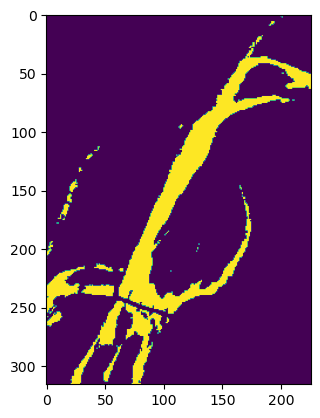

<AxesSubplot:>

In [12]:
a = np.array(pred_22)
pred_22 = a.reshape(316,226)

img = np.array(pred_22, dtype=np.uint8)
type(img[0,0])
img = img*255

print(img[0,40],pred_22[0,40])
print(img[25,0],pred_22[150,0])
#print(img[0,6],pred_22[0,6])

img3 = Image.fromarray(img)
img3.save('svm6-12-19.png')
show(img3)